In [11]:
# Utilities

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve


from sklearn.naive_bayes import MultinomialNB,CategoricalNB,GaussianNB

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler



In [33]:

df=pd.read_csv("..\..\prepared_ravdess_features.csv")
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,Dogs are sitting by the door,1st,F,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,speech,happy,strong,Dogs are sitting by the door,2nd,F,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,Kids are talking by the door,1st,F,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


# Trasformazione Variabili Categoriche con due valori  -> trasformo in binario utilizzando labelEncoder()

In [13]:
df_copy=df.copy()

cat_var=["vocal_channel","emotional_intensity","statement","repetition","sex"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_copy[i]=le.fit_transform(df_copy[i])
df_copy.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,1,fearful,0,0,1,0,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,1,angry,0,0,0,0,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,1,happy,1,0,1,0,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,1,surprised,0,1,0,0,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,0,happy,1,0,1,0,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


# LabelEncoder() pure per la variabile categorica target "emotion"

In [14]:
"""
Angry=0
Calm=1
Disgust=2
Fearful=3
Happy=4
Neutral=5
Sad=6
Surprised=7

"""

le=preprocessing.LabelEncoder()
df_copy["emotion"]=le.fit_transform(df_copy["emotion"])
df_copy.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,1,3,0,0,1,0,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,1,0,0,0,0,0,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,1,4,1,0,1,0,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,1,7,0,1,0,0,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,0,4,1,0,1,0,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [15]:
#df_copy["emotion"]=le.inverse_transform(df_copy["emotion"])
#df_copy.head()

Per il Naive Bayes non è stato ritenuto necessario applicare alcuna normalizzazione dei dati in quanto non viene utilizzata nessuna metrica di distanza 

Funzioni utili per le analisi e la classificazione

In [16]:
# Print confusion matrix
def print_confMatrix(y_test,y_test_pred):
    cf = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cf, annot=True, cmap="Greens")
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.show()

In [17]:
# Print Roc Curve 
def print_rocCurve(clf,X_test,y_test):
    clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()
    print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

In [18]:
# Print Precision-Recall Curve
def print_precrecCurve(clf,X_test,y_test):
    plot_precision_recall(y_test, clf.predict_proba(X_test),figsize=(10,7))
    plt.show()

In [19]:
def cumulativeGain_AND_Lift_Curve(clf,X_test,y_test):
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6))
    plot_cumulative_gain(y_test, clf.predict_proba(X_test), ax=axs[0],figsize=(10,7))
    plot_lift_curve(y_test, clf.predict_proba(X_test), ax=axs[1],figsize=(10,7))
    plt.tight_layout()
    plt.show()  

Naive Bayes doesn't have any hyperparameters to tune

 Partitioning

In [20]:
col=[x for x in df_copy.columns if x!="emotion"]
X=df_copy[col].values
y = np.array(df_copy["emotion"])

#holdout
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

Test 1 : GaussianNB()

In [21]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59       110
           1       0.64      0.23      0.34       110
           2       0.23      0.52      0.32        58
           3       0.52      0.21      0.29       112
           4       0.38      0.26      0.31       111
           5       0.25      0.48      0.33        56
           6       0.25      0.21      0.23       112
           7       0.26      0.63      0.37        57

    accuracy                           0.35       726
   macro avg       0.40      0.39      0.35       726
weighted avg       0.43      0.35      0.35       726



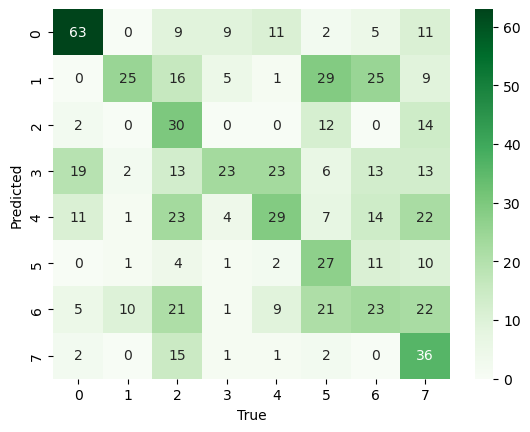

In [23]:
print_confMatrix(y_test,y_pred)

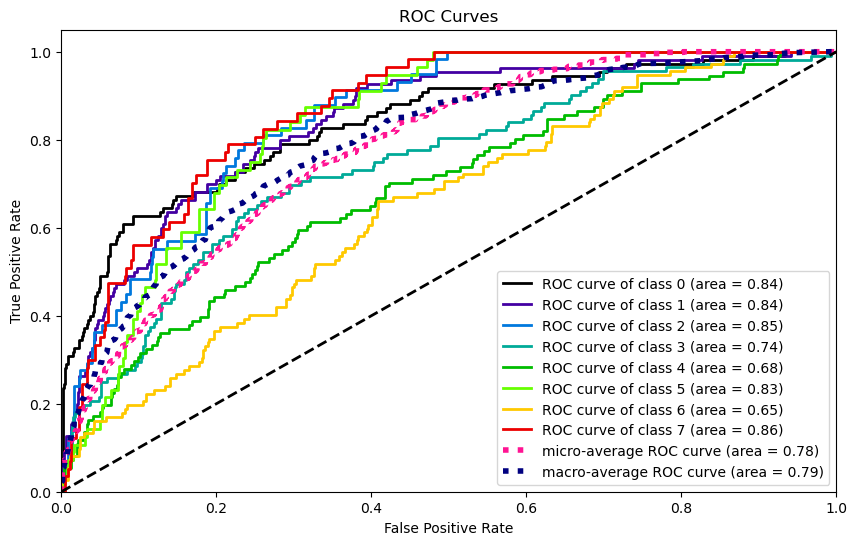

0.7878844274888975


In [24]:
print_rocCurve(clf,X_test,y_test)

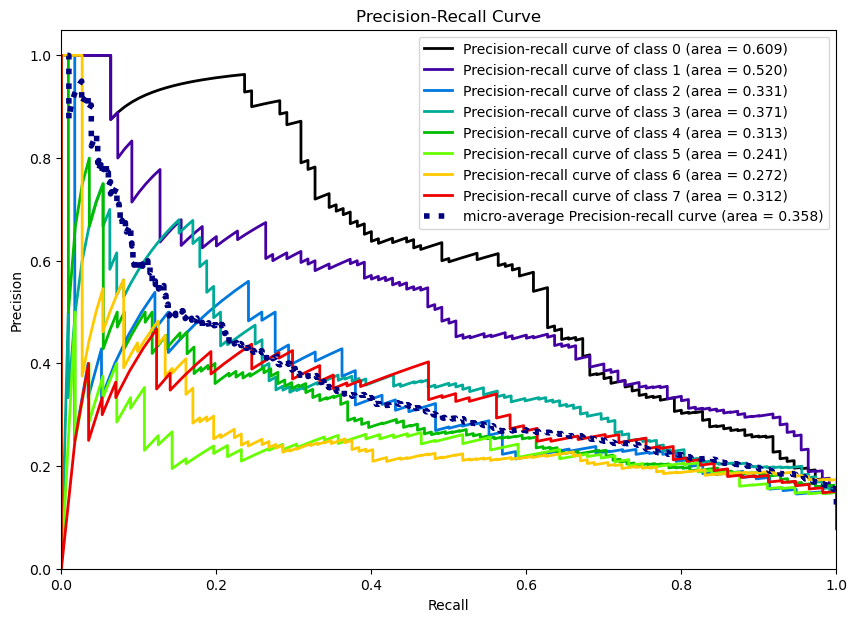

In [25]:
print_precrecCurve(clf,X_test,y_test)

In [26]:
#
# Impossibile utilizzare questo tipo di grafico perchè ho 8 classi
# 
# cumulativeGain_AND_Lift_Curve(clf,X_test,y_test)

Test2: CategoricalNB()

In [27]:
# Impossibile utilizzare la CategoricalNB() per dati negativi


#clf = CategoricalNB()
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)

Test3: MultinomialNB()

In [28]:
# # Impossibile utilizzare la CategoricalNB() per dati negativi


#clf = MultinomialNB()
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)

# Ultimo esperimento: 
  Normalizzare i dati per evitare numeri negativi

In [29]:
df_normalized=df_copy.copy()


scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_normalized[col])
df_normalized[col] = scaled_features


X=df_normalized[col].values
y = np.array(df_normalized["emotion"])

#holdout
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)


c:\Users\david\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\david\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\david\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.45      0.67      0.54       110
           1       1.00      0.02      0.04       110
           2       0.15      0.91      0.26        58
           3       0.33      0.02      0.03       112
           4       0.00      0.00      0.00       111
           5       0.26      0.43      0.32        56
           6       0.22      0.21      0.22       112
           7       0.00      0.00      0.00        57

    accuracy                           0.25       726
   macro avg       0.30      0.28      0.18       726
weighted avg       0.34      0.25      0.17       726



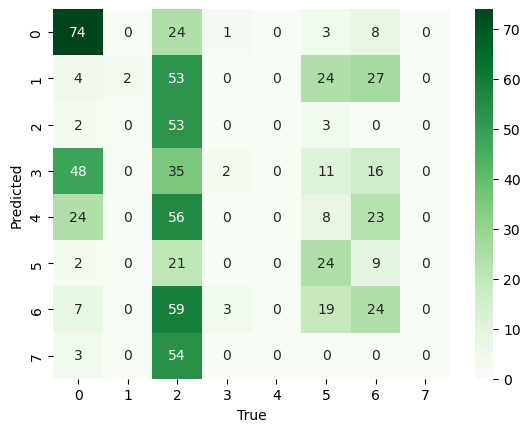

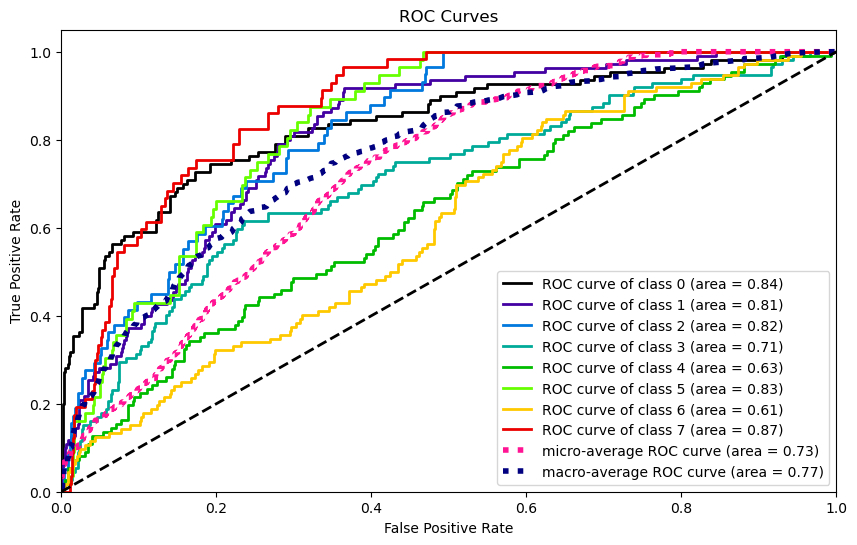

0.7656587589841941


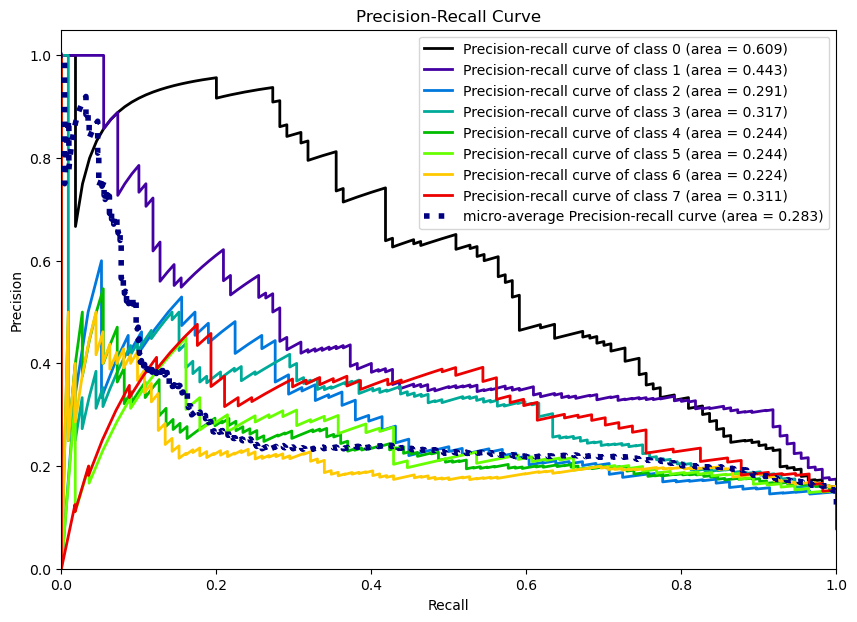

In [30]:
# Gaussian Bayes


clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print_confMatrix(y_test,y_pred)
print_rocCurve(clf,X_test,y_test)
print_precrecCurve(clf,X_test,y_test)




              precision    recall  f1-score   support

           0       0.56      0.54      0.55       110
           1       0.47      0.42      0.44       110
           2       0.00      0.00      0.00        58
           3       0.27      0.21      0.23       112
           4       0.29      0.29      0.29       111
           5       0.17      0.21      0.19        56
           6       0.19      0.42      0.26       112
           7       0.00      0.00      0.00        57

    accuracy                           0.30       726
   macro avg       0.24      0.26      0.24       726
weighted avg       0.28      0.30      0.28       726



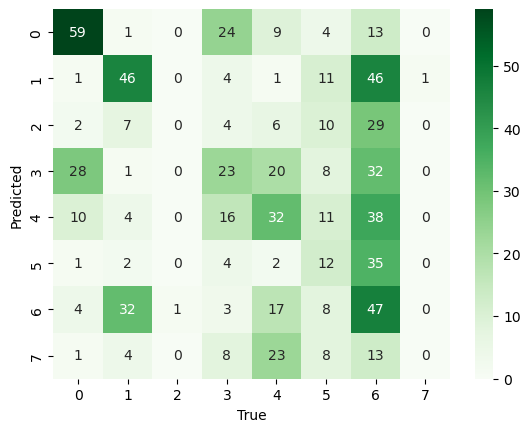

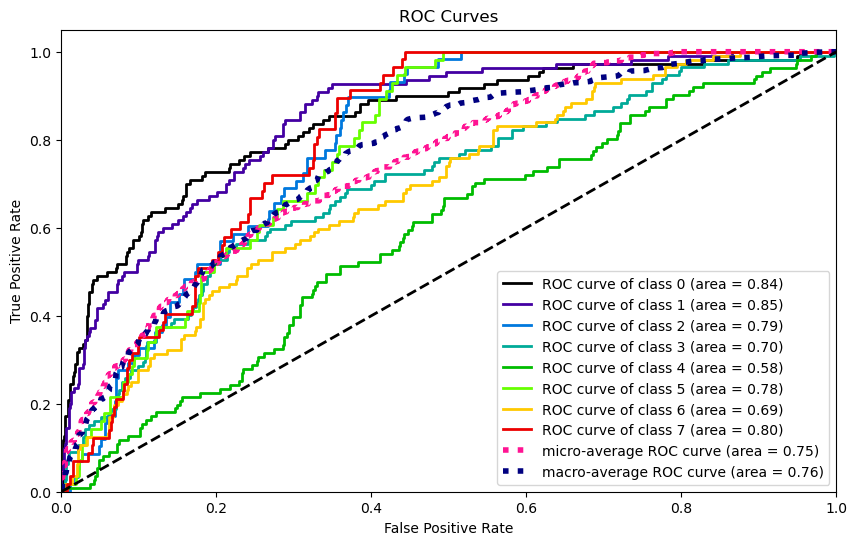

0.7550956716471924


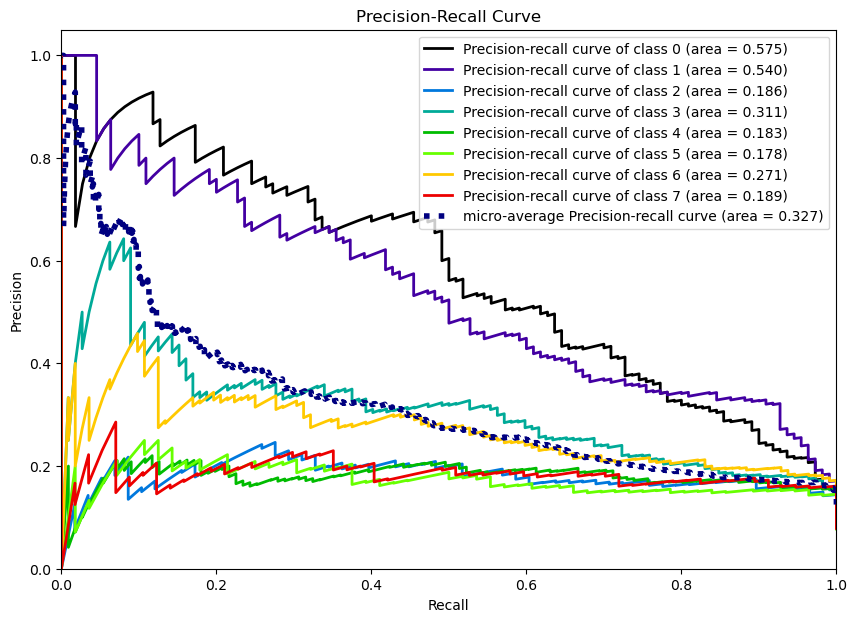

In [31]:
# Multinomial Bayes


clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print_confMatrix(y_test,y_pred)
print_rocCurve(clf,X_test,y_test)
print_precrecCurve(clf,X_test,y_test)

In [32]:
# Categorical Bayes ---> Non funziona con questi dati

"""

clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print_confMatrix(y_test,y_pred)
print_rocCurve(clf,X_test,y_test)
print_precrecCurve(clf,X_test,y_test)

"""

'\n\nclf = CategoricalNB()\nclf.fit(X_train, y_train)\ny_pred = clf.predict(X_test)\n\nprint(classification_report(y_test, y_pred))\nprint_confMatrix(y_test,y_pred)\nprint_rocCurve(clf,X_test,y_test)\nprint_precrecCurve(clf,X_test,y_test)\n\n'